For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("911.csv")

In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


check top 5 zip code of calls

In [8]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

top 5 townsips of 911 calls

In [11]:
data['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

check the unique titles in the title column

In [13]:
data['title'].nunique()

110

In [15]:
data['Reason'] = data['title'].apply(lambda x:x.split(':')[0])

In [16]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

seaborn to create a countplot

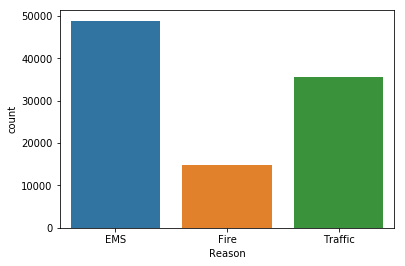

In [17]:
sns.countplot(data['Reason'])

data type of timestamp

In [18]:
data.timeStamp.dtype

dtype('O')

In [21]:
type(data['timeStamp'].iloc[0])

str

convert timestamp from string to datetime

In [22]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [23]:
data.timeStamp.dtype

dtype('<M8[ns]')

In [24]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
data['date'] = data['timeStamp'].apply(lambda x:x.date())

In [27]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10


similary we can grab other variables from timestamp

In [29]:
data['hour'] = data['timeStamp'].apply(lambda time:time.hour)
data['month'] = data['timeStamp'].apply(lambda time:time.month)
data['dayofweek'] = data['timeStamp'].apply(lambda time:time.dayofweek)
data['day'] = data['timeStamp'].apply(lambda time:time.day)

In [30]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,hour,month,dayofweek,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17,12,3,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17,12,3,10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,17,12,3,10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,17,12,3,10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10,17,12,3,10


In [31]:
dmap = {1:"Mon", 2:"Tue", 3:"Wed", 4:"Thr", 5:"Fri", 6:"Sat", 7:"Sun"}

In [32]:
data['dayofweek'] = data['dayofweek'].map(dmap)

In [33]:
data['dayofweek'].value_counts()

Mon    15150
Tue    14879
Thr    14833
Wed    14478
Fri    13336
Sat    12136
Name: dayofweek, dtype: int64

In [35]:
data['dayofweek'].unique()

array(['Wed', 'Thr', 'Fri', 'Sat', nan, 'Mon', 'Tue'], dtype=object)

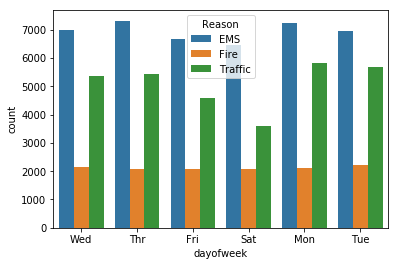

In [37]:
sns.countplot(x='dayofweek', data=data, hue='Reason')

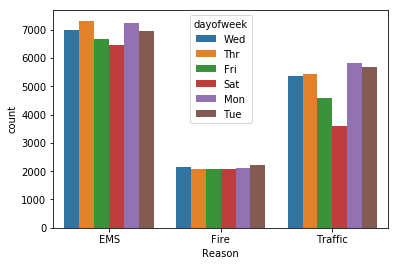

In [38]:
sns.countplot(x='Reason', data=data, hue='dayofweek')

Now do the same for month

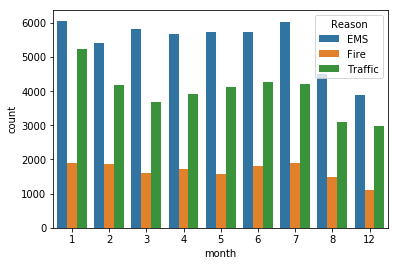

In [39]:
sns.countplot(x='month', data=data, hue='Reason')

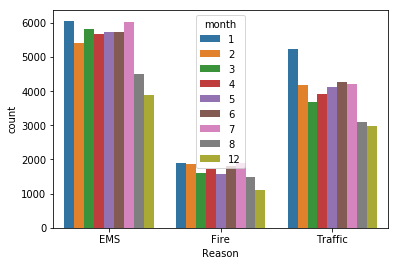

In [41]:
sns.countplot(x='Reason', data=data, hue='month')

In [42]:
time = data['timeStamp'].iloc[0]

In [44]:
time.year

2015

In [52]:
data['year'] = data['timeStamp'].apply(lambda x:x.year)

In [54]:
data['year'].value_counts()

2016    91523
2015     7969
Name: year, dtype: int64

In [55]:
data['month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: month, dtype: int64

We noticed that the data is missing some months

In [59]:
data.groupby('month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,hour,dayofweek,day,year
month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,11478,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,9503,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,9566,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,9728,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,9644,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,10169,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,10445,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,7567,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,6712,7969,7969


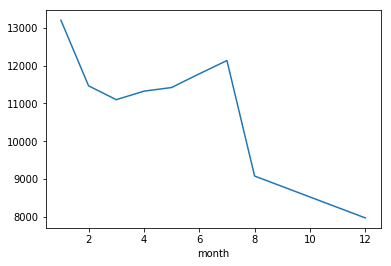

In [61]:
data.groupby('month').count()['lat'].plot()

now create a lmplot for the same

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


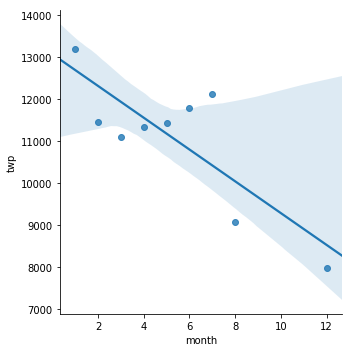

In [63]:
bymonth = data.groupby('month').count()
sns.lmplot(x='month', y='twp',data = bymonth.reset_index())

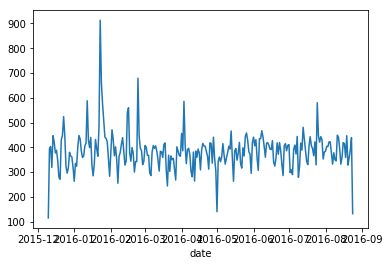

In [67]:
data.groupby('date').count()['lat'].plot()

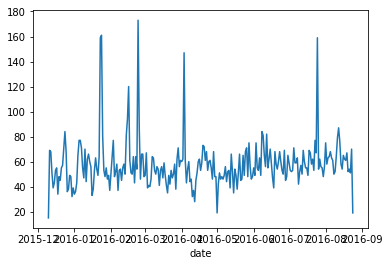

In [73]:
data[data['Reason'] == 'Fire'].groupby('date').count()['lat'].plot()

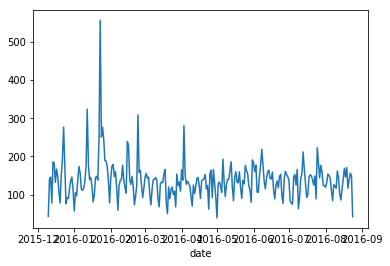

In [74]:
data[data['Reason'] == 'Traffic'].groupby('date').count()['lat'].plot()

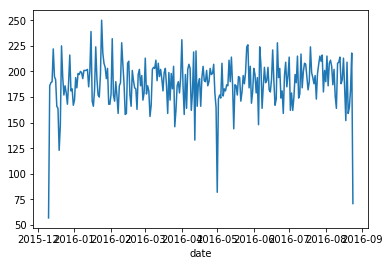

In [75]:
data[data['Reason'] == 'EMS'].groupby('date').count()['lat'].plot()

In [78]:
data.pivot_table(index='dayofweek', columns='hour').unstack()

     hour  dayofweek
day  0     Fri             16.008000
           Mon             15.234201
           Sat             16.644909
           Thr             14.010909
           Tue             16.412000
           Wed             17.341727
     1     Fri             16.126246
           Mon             15.704167
           Sat             17.316993
           Thr             14.570213
           Tue             16.962963
           Wed             16.841584
     2     Fri             15.669202
           Mon             15.978495
           Sat             16.325175
           Thr             14.172775
           Tue             17.793651
           Wed             17.330472
     3     Fri             16.126923
           Mon             16.805882
           Sat             15.570896
           Thr             14.502857
           Tue             17.162679
           Wed             17.157233
     4     Fri             17.651786
           Mon             16.937799
           Sat   

In [81]:
data.groupby(by = ['dayofweek','hour']).count()['Reason']

dayofweek  hour
Fri        0        375
           1        301
           2        263
           3        260
           4        224
           5        231
           6        257
           7        391
           8        459
           9        640
           10       697
           11       769
           12       801
           13       831
           14       789
           15       796
           16       848
           17       757
           18       778
           19       696
           20       628
           21       572
           22       506
           23       467
Mon        0        269
           1        240
           2        186
           3        170
           4        209
           5        239
                   ... 
Tue        18       894
           19       686
           20       668
           21       575
           22       490
           23       335
Wed        0        278
           1        202
           2        233
           3        159


In [84]:
a = data.groupby(by = ['dayofweek','hour']).count()['Reason'].unstack().head()

In [85]:
a

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Mon,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Sat,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thr,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Tue,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


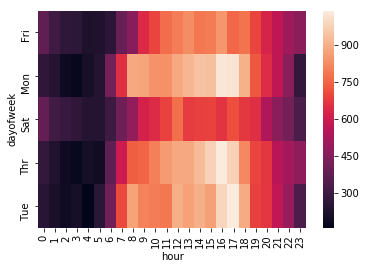

In [86]:
sns.heatmap(a)

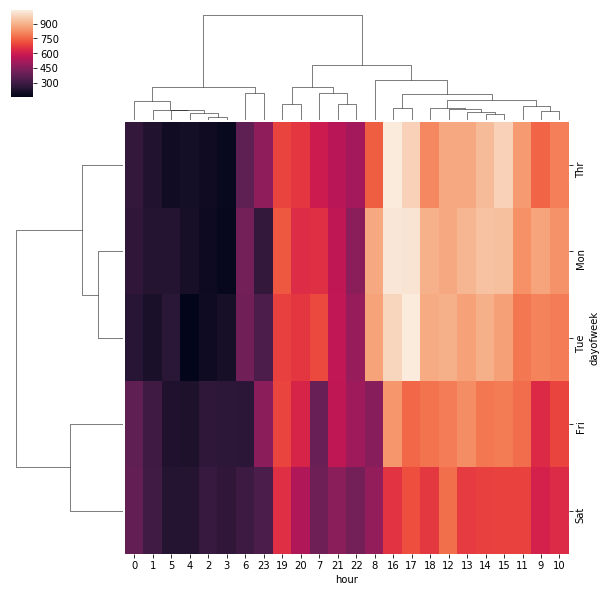

In [88]:
sns.clustermap(a)

In [89]:
data.pivot_table(index='dayofweek', columns='month').unstack()

     month  dayofweek
day  1      Fri             17.772152
            Mon             15.526609
            Sat             17.621429
            Thr             16.581218
            Tue             16.471176
            Wed             17.760732
     2      Fri             16.886190
            Mon             12.086708
            Sat             18.015460
            Thr             15.493359
            Tue             14.792958
            Wed             14.824561
     3      Fri             15.511058
            Mon             14.450106
            Sat             16.137931
            Thr             14.488525
            Tue             15.640551
            Wed             16.764211
     4      Fri             15.600346
            Mon             16.474126
            Sat             11.632392
            Thr             14.327886
            Tue             16.165458
            Wed             17.891318
     5      Fri             17.533934
            Mon             

In [90]:
b = data.groupby(by = ['dayofweek','hour']).count()['Reason'].unstack().head()
b

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Mon,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Sat,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thr,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Tue,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


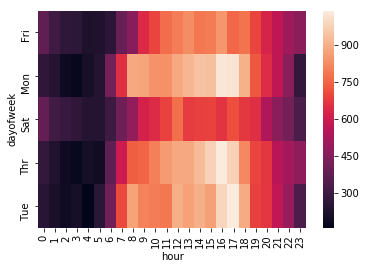

In [91]:
sns.heatmap(b)

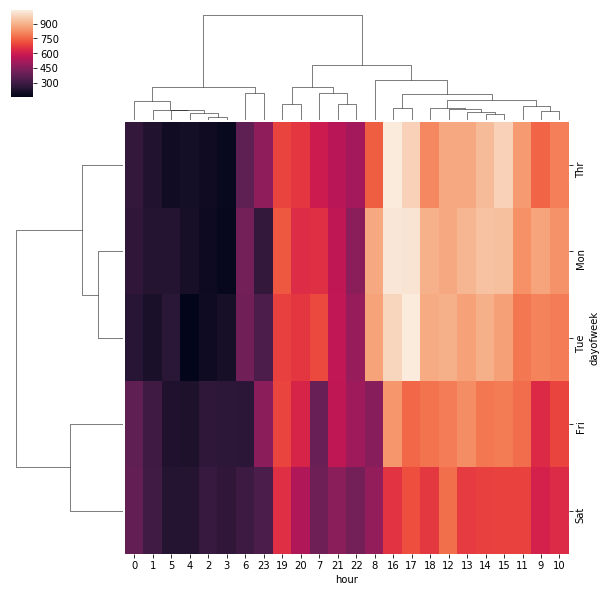

In [92]:
sns.clustermap(b)